In [4]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd 
pd.set_option('display.max_rows', None)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Low': np.random.rand(100) * 10  # 随机生成股价最低点
})

# 寻找股价最低点
min_points = data.loc[data['Low'] == data['Low'].min()]

# 连接最低点
x = np.arange(len(data))
y = np.poly1d(np.polyfit(min_points.index, min_points['Low'], 1))(x)

# 绘制原始数据和趋势线
plt.scatter(data['Date'], data['Low'], label='Low Prices')
plt.plot(data['Date'], y, color='red', label='Trend Line')

plt.title('Trend Line Connecting Low Prices')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据
data = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'Low': np.random.rand(100) * 10  # 随机生成股价最低点
})

# 识别趋势转折点
change_points = np.where(np.diff(np.sign(np.gradient(data['Low']))))[0]

# 连接趋势转折点
for i in range(len(change_points) - 1):
    x = np.arange(change_points[i], change_points[i+1])
    y = np.poly1d(np.polyfit(x, data['Low'].iloc[x], 1))(x)
    plt.plot(data['Date'].iloc[x], y, color='blue', linestyle='--')  # 画出旧的趋势线

# 连接最后一个趋势线
x = np.arange(change_points[-1], len(data))
y = np.poly1d(np.polyfit(x, data['Low'].iloc[x], 1))(x)
plt.plot(data['Date'].iloc[x], y, color='blue', linestyle='--', label='Old Trend Line')

# 寻找新的股价最低点并连接
new_low_points = np.where(np.diff(np.sign(np.gradient(data['Low']))))[0]
for i in range(len(new_low_points) - 1):
    x = np.arange(new_low_points[i], new_low_points[i+1])
    y = np.poly1d(np.polyfit(x, data['Low'].iloc[x], 1))(x)
    plt.plot(data['Date'].iloc[x], y, color='green', linestyle='--')  # 画出新的趋势线

# 画出原始数据
plt.plot(data['Date'], data['Low'], color='grey', label='Low Prices')

plt.title('Trend Lines with Reversals')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()
plt.show()


In [ ]:
change_points

In [ ]:
! pip install scipy

In [86]:
from pybroker import YFinance
import pybroker
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pybroker.enable_data_source_cache('yfinance')
import warnings
warnings.filterwarnings('ignore')
yfinance = YFinance()
df = yfinance.query(['TSLA'], start_date='3/1/2012', end_date='12/21/2023')
df['date'] = pd.to_datetime(df['date']).dt.date

Loading bar data...
[*********************100%%**********************]  1 of 1 completed
Loaded bar data: 0:00:00 



[0 1 2]
[2 3 4 5]
[5 6 7 8]


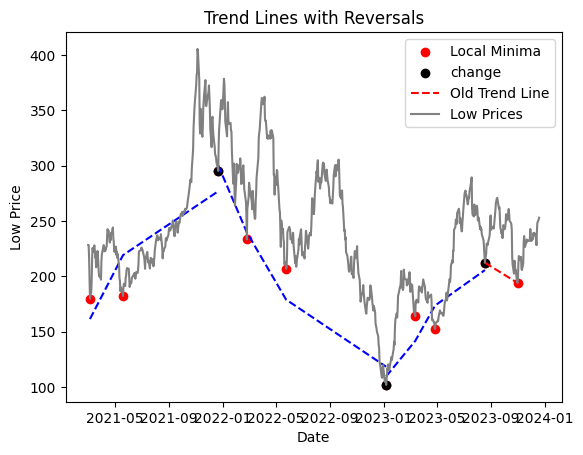

In [78]:
data = df


from scipy.signal import argrelextrema

minima_indices = argrelextrema(data['low'].values, np.less, order = 20)[0]

plt.scatter(data['date'].iloc[minima_indices], data['low'].iloc[minima_indices], color='red', label='Local Minima')
data_min = data.iloc[minima_indices]

# 识别趋势转折点
change_points = np.where(np.diff(np.sign(np.gradient(data_min['low']))))[0] 
plt.scatter(data_min['date'].iloc[change_points], data_min['low'].iloc[change_points], color='black', label='change')
change_points = np.insert(change_points, 0, 0)
# 连接趋势转折点
for i in range( len(change_points) - 1):
    x = np.arange(change_points[i], change_points[i+1] + 1)
    print(x)
    y = np.poly1d(np.polyfit(x, data_min['low'].iloc[x], 1))(x)
    plt.plot(data_min['date'].iloc[x], y, color='blue', linestyle='--')  # 画出旧的趋势线

# 连接最后一个趋势线
x = np.arange(change_points[-1], len(data_min) )
y = np.poly1d(np.polyfit(x, data_min['low'].iloc[x], 1))(x)
plt.plot(data_min['date'].iloc[x], y, color='red', linestyle='--', label='Old Trend Line')

# 寻找新的股价最低点并连接
# new_low_points = np.where(np.diff(np.sign(np.gradient(data_min['low']))))[0]
# for i in range(len(new_low_points) - 1):
#     x = np.arange(new_low_points[i], new_low_points[i+1])
#     y = np.poly1d(np.polyfit(x, data_min['low'].iloc[x], 1))(x)
#     plt.plot(data_min['date'].iloc[x], y, color='green', linestyle='--')  # 画出新的趋势线

# 画出原始数据
plt.plot(data['date'], data['low'], color='grey', label='Low Prices')

plt.title('Trend Lines with Reversals')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()
plt.show()

In [34]:
x

array([11, 12, 13, 14, 15])

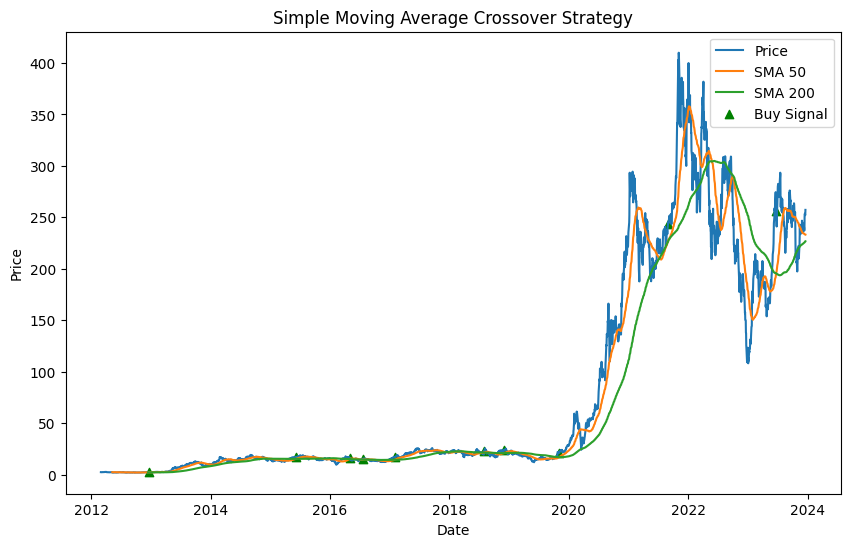

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # 生成示例数据
# np.random.seed(42)
# date_rng = pd.date_range(start='2022-01-01', end='2023-01-01', freq='B')
# prices = np.cumsum(np.random.normal(0, 1, size=len(date_rng)))
# df = pd.DataFrame({'Date': date_rng, 'Price': prices})

# 计算移动平均线
df['SMA_50'] = df['adj_close'].rolling(window=50).mean()
df['SMA_200'] = df['adj_close'].rolling(window=200).mean()

# 判断趋势
df['Signal'] = 0  # 0 表示无信号
df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1  # 1 表示买入信号

# 计算持仓
df['Position'] = df['Signal'].diff()

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['adj_close'], label='Price')
plt.plot(df['date'], df['SMA_50'], label='SMA 50')
plt.plot(df['date'], df['SMA_200'], label='SMA 200')

# 标记买入信号
plt.scatter(df['date'][df['Position'] == 1], df['adj_close'][df['Position'] == 1], marker='^', color='g', label='Buy Signal')

plt.title('Simple Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [85]:
df

,date,symbol,open,high,low,close,volume,adj_close,SMA_50,SMA_200,Signal,Position
0,2021-03-01,TSLA,230.036667,239.666672,228.350006,239.476669,81408600,239.476669,NaN,NaN,0,NaN
1,2021-03-02,TSLA,239.426666,240.369995,228.333328,228.813339,71196600,228.813339,NaN,NaN,0,0.0
2,2021-03-03,TSLA,229.330002,233.566666,217.236664,217.733337,90624000,217.733337,NaN,NaN,0,0.0
3,2021-03-04,TSLA,218.600006,222.816666,200.000000,207.146667,197758500,207.146667,NaN,NaN,0,0.0
4,2021-03-05,TSLA,208.686661,209.279999,179.830002,199.316666,268189500,199.316666,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
703,2023-12-13,TSLA,234.190002,240.300003,228.199997,239.289993,146286300,239.289993,233.7302,225.50710,1,0.0
704,2023-12-14,TSLA,241.220001,253.880005,240.789993,251.050003,160829200,251.050003,233.5280,225.74850,1,0.0
705,2023-12-15,TSLA,251.210007,254.130005,248.300003,253.500000,135720800,253.500000,233.3970,226.06150,1,0.0
706,2023-12-18,TSLA,253.779999,258.739990,251.360001,252.080002,116416500,252.080002,233.2280,226.33295,1,0.0


In [2]:
import akshare as ak

cls_df = ak.stock_telegraph_cls(symbol="全部")

ImportError: cannot import name 'DEFAULT_CIPHERS' from 'urllib3.util.ssl_' (/usr/local/lib/python3.9/site-packages/urllib3/util/ssl_.py)

In [8]:
cls_df[cls_df['标题'] != '']

,标题,内容,发布日期,发布时间
0,三七互娱：正在研究网络游戏整改征求意见所带来的影响,【三七互娱：正在研究网络游戏整改征求意见所带来的影响】财联社12月22日电，三七互娱回应称，...,2023-12-22,15:58:37
2,欧股开盘下跌,【欧股开盘下跌】财联社12月22日电，欧股开盘下跌，德国DAX30指数跌0.16%，英国富时...,2023-12-22,16:00:43
3,安彩高科：拟向子公司增资建设石英玻璃项目,【安彩高科：拟向子公司增资建设石英玻璃项目】财联社12月22日电，安彩高科公告，公司拟向全资...,2023-12-22,16:01:06
4,美商务部称将审查中国传统半导体供应链 外交部回应,【美商务部称将审查中国传统半导体供应链 外交部回应】财联社12月22日电，记者提问，美国商务...,2023-12-22,16:01:28
5,维力医疗：获得两项医疗器械注册证,【维力医疗：获得两项医疗器械注册证】财联社12月22日电，维力医疗公告，公司于近日收到广东省...,2023-12-22,16:02:16
6,2023年工业互联网核心产业达1.35万亿,【2023年工业互联网核心产业达1.35万亿】财联社12月22日电，中国工业互联网研究院12...,2023-12-22,16:03:50
7,《移动通信与AI融合的数据格式和模型建议书》发布,【《移动通信与AI融合的数据格式和模型建议书》发布】财联社12月22日电，中国信息通信研究院...,2023-12-22,16:05:48
8,上海出口集装箱综合运价指数为1254.99点 较上期增长161.47点或14.77%,【上海出口集装箱综合运价指数为1254.99点 较上期增长161.47点或14.77%】财联...,2023-12-22,16:07:59
9,苏州相城区底价出让3宗涉宅用地 成交总价33.98亿元,【苏州相城区底价出让3宗涉宅用地 成交总价33.98亿元】财联社12月22日电，苏州迎来3宗...,2023-12-22,16:08:05
10,恒生科技指数收跌4.37% 网易跌超24%、腾讯控股跌超12%,【恒生科技指数收跌4.37% 网易跌超24%、腾讯控股跌超12%】财联社12月22日电，香港...,2023-12-22,16:09:47


In [4]:
import akshare as ak
js_news_df = ak.js_news(indicator='最新资讯')

ImportError: cannot import name 'DEFAULT_CIPHERS' from 'urllib3.util.ssl_' (/usr/local/lib/python3.9/site-packages/urllib3/util/ssl_.py)

In [10]:
ak.macro_bank_usa_interest_rate()

,商品,日期,今值,预测值,前值
0,美联储利率决议,1982-09-28,10.25,NaN,NaN
1,美联储利率决议,1982-10-02,10.00,NaN,10.25
2,美联储利率决议,1982-10-08,9.50,NaN,10.00
3,美联储利率决议,1982-11-20,9.00,NaN,9.50
4,美联储利率决议,1982-12-15,8.50,NaN,9.00
5,美联储利率决议,1983-04-01,8.62,NaN,8.50
6,美联储利率决议,1983-05-26,8.75,NaN,8.62
7,美联储利率决议,1983-06-25,9.00,NaN,8.75
8,美联储利率决议,1983-07-15,9.25,NaN,9.00
9,美联储利率决议,1983-07-21,9.43,NaN,9.25


In [5]:
import pandas as pd
import requests


def js_news(timestamp: str = "2022-12-17 17:52:58") -> pd.DataFrame:
    """
    金十数据-市场快讯
    https://www.jin10.com/
    :param timestamp: choice of {'最新资讯', '最新数据'}
    :type timestamp: str
    :return: 市场快讯
    :rtype: pandas.DataFrame
    """
    url = "https://flash-api.jin10.com/get_flash_list"
    params = {
        "channel": "-8200",
        "vip": "1",
        "max_time": timestamp,
        "t": "1671282353147",

    }
    headers = {
        "accept": "application/json, text/plain, */*",
        "accept-encoding": "gzip, deflate, br",
        "accept-language": "zh-CN,zh;q=0.9,en;q=0.8",
        "cache-control": "no-cache",
        'handleerror': 'true',
        "origin": "https://www.jin10.com",
        "pragma": "no-cache",
        "referer": "https://www.jin10.com/",
        "sec-ch-ua": '" Not;A Brand";v="99", "Google Chrome";v="91", "Chromium";v="91"',
        "sec-ch-ua-mobile": "?0",
        "sec-fetch-dest": "empty",
        "sec-fetch-mode": "cors",
        "sec-fetch-site": "same-site",
        "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
        "x-app-id": "bVBF4FyRTn5NJF5n",
        "x-version": "1.0.0",
    }
    r = requests.get(url, params=params, headers=headers)
    data_json = r.json()
    temp_df = pd.DataFrame(data_json["data"])
    temp_list = []
    for item in temp_df["data"]:
        if "content" in item.keys():
            temp_list.append(item["content"])
        elif "pic" in item.keys():
            temp_list.append(item["pic"])
        else:
            temp_list.append("-")
    temp_df = pd.DataFrame([temp_df["time"].to_list(), temp_list]).T
    temp_df.columns = ["datetime", "content"]
    temp_df.sort_values(["datetime"], inplace=True)
    temp_df.reset_index(inplace=True, drop=True)
    return temp_df


if __name__ == "__main__":
    js_news_df = js_news(timestamp="2022-12-17 20:52:58")
    print(js_news_df)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [225]:
timestamp="2023-12-22 22:31:47"
url = "https://classify-ws.jin10.com:5142/flash"
params = {
    "channel": "-8200",
    "vip": "1",
    "max_time": timestamp,
    'classify': '[24]'

}
headers = {
    "accept": "application/json, text/plain, */*",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "zh-CN,zh;q=0.9,en;q=0.8",
    "cache-control": "no-cache",
    'handleerror': 'true',
    "origin": "https://www.jin10.com",
    "pragma": "no-cache",
    "referer": "https://www.jin10.com/",
    "sec-ch-ua": '"Not_A Brand";v="8", "Chromium";v="120", "Google Chrome";v="120"',
    "sec-ch-ua-mobile": "?0",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-site",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36",
    "x-app-id": "bVBF4FyRTn5NJF5n",
    "x-version": "1.0.0",
}


import requests

r = requests.get(url, params=params, headers=headers)

In [228]:
df = pd.DataFrame(r.json()['data'])

# df = df[(df['important']==1) & (df['extras'].apply(pd.Series)['ad'] == False) & (df['data'].apply(pd.Series)['lock'] != True)]
df = df[(df['extras'].apply(pd.Series)['ad'] == False)]

df = df['data'].apply(pd.Series).join( df[['time','channel','child_channel','sources']], on = df.index)

/tmp/ipykernel_18361/3228040447.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = df[(df['extras'].apply(pd.Series)['ad'] == False)]
/tmp/ipykernel_18361/3228040447.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = df[(df['extras'].apply(pd.Series)['ad'] == False)]
/tmp/ipykernel_18361/3228040447.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = df[(df['extras'].apply(pd.Series)['ad'] == False)]
/tmp/ipykernel_18361/3228040447.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df = df[(df['extras'].apply(

In [229]:
pd.set_option('display.max_colwidth', None)

df

,pic,title,source,content,source_link,vip_level,time,channel,child_channel,sources
0,,,,美国财政部副部长Adeyemo：俄罗斯在规避制裁方面变得“非常出色”。,,NaN,2023-12-22 21:29:16,"[1, 3]",{'1': [1]},"[1, 3]"
1,,,,美国财政部副部长Adeyemo：大多数金融机构都遵守对俄罗斯的制裁。,,NaN,2023-12-22 21:26:42,"[1, 3]",{'1': [1]},"[1, 3]"
2,,,央视新闻,【俄罗斯驻德国莱比锡总领馆已关闭】金十数据12月22日讯，当地时间22日，俄罗斯外交部称，俄罗斯驻德国莱比锡总领事馆已于21日正式关闭。今年5月底，德国要求俄罗斯在今年年底前关闭驻德5个总领馆中的4个，此举是对俄方宣布限制德国驻俄外交官数量的回应。德国也已从11月起关闭了德国驻俄罗斯加里宁格勒、叶卡捷琳堡和新西伯利亚的领事馆。,,NaN,2023-12-22 21:15:24,[1],{'1': [1]},[1]
3,,,,路透调查：到2024年底，俄罗斯的关键利率将降至12%。,,NaN,2023-12-22 21:02:39,[1],{'1': [1]},[1]
4,,,,乌克兰总统泽连斯基：荷兰政府已开始准备将首批18架F-16战机交付给乌克兰。,,NaN,2023-12-22 20:39:23,"[1, 2, 3]","{'1': [1], '2': [30]}","[1, 2, 3]"
6,,,央视新闻,【美乌国防部长就乌克兰局势通话】金十数据12月22日讯，当地时间22日，乌克兰国防部长乌梅罗夫在社交媒体上表示，当天他与美国国防部长奥斯汀通电话。双方就最新的安全事态发展、未来乌克兰武装部队的结构等问题进行了讨论。,,NaN,2023-12-22 19:56:35,"[1, 2, 3]","{'1': [1], '2': [30]}","[1, 2, 3]"
7,,,,据塔斯社援引克里姆林宫：俄罗斯总统普京向巴勒斯坦领导人阿巴斯保证，俄罗斯将继续向加沙地带提供必需品，包括药品和医疗设备。,,NaN,2023-12-22 19:38:14,"[1, 2, 3]","{'1': [1], '2': [30]}","[1, 2, 3]"
8,,,,<b>据塔斯社援引克里姆林宫：俄罗斯总统普京与巴勒斯坦领导人阿巴斯进行了电话交谈。</b>,,NaN,2023-12-22 19:34:45,"[1, 2, 3]","{'1': [1], '2': [30]}","[1, 2, 3]"
9,,,,欧盟委员会主席冯德莱恩：欧盟正在考虑2024年更广泛的中期计划，以促进加沙地带和约旦河西岸的经济和政治稳定。,,NaN,2023-12-22 19:09:53,"[1, 2, 3]","{'1': [1], '2': [30]}","[1, 2, 3]"
10,,,,据声明显示，欧盟向巴勒斯坦当局提供超过1.18亿欧元。,,NaN,2023-12-22 19:07:37,[1],{'1': [1]},[1]
